In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
from dateutil import parser
from os import remove



In [2]:
#Cargamos el archivo de datos
df_reviews1 = pd.read_parquet('df_reviews1.parquet', engine='fastparquet', index=False)

In [3]:
#Cargamos el archivo de datos
df_items1 = pd.read_parquet('df_items1.parquet', engine='fastparquet', index=False)

In [4]:
#Cargamos el archivo de datos
df_games = pd.read_parquet('df_games.parquet', engine='fastparquet', index=False)

In [5]:
# cargamos el archivo de datos
df_items = pd.read_parquet('df_items.parquet', engine='fastparquet', index=False)

    ANALISIS DE SENTIMIENTOS

In [6]:
df_reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58430 entries, 0 to 58429
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        58430 non-null  int64 
 1   funny        58430 non-null  object
 2   posted       58430 non-null  object
 3   last_edited  58430 non-null  object
 4   item_id      58430 non-null  object
 5   helpful      58430 non-null  object
 6   recommend    58430 non-null  bool  
 7   review       58430 non-null  object
dtypes: bool(1), int64(1), object(6)
memory usage: 3.2+ MB


In [7]:
# eliminamos las columnas que no nos sirven
df_reviews1.drop(['funny','last_edited','helpful','index'], axis=1, inplace=True)
df_reviews1

,posted,item_id,recommend,review
0,"November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
1,"July 15, 2011.",22200,True,It's unique and worth a playthrough.
2,"April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
3,"June 24, 2014.",251610,True,I know what you think when you see this title ...
4,"September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...
58425,July 10.,70,True,a must have classic from steam definitely wort...
58426,July 8.,362890,True,this game is a perfect remake of the original ...
58427,July 3.,273110,True,had so much fun plaing this and collecting res...
58428,July 20.,730,True,:D


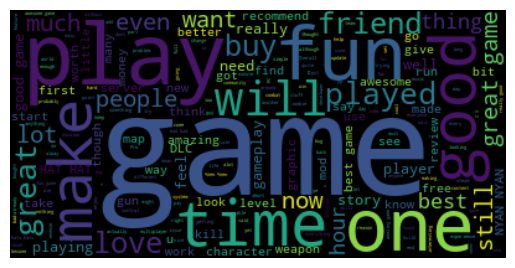

In [8]:
#Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
texto = " ".join(i for i in df_reviews1.review)
wordcloud = WordCloud(stopwords=stopwords).generate(texto)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [9]:
# creamos un función para que TextBlob analice el lenguaje
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

#Creamos una columna nueva a la que la aplicamos la función de análisis de sentimientos de TextBlob
df_reviews1['sentiment'] = df_reviews1['review'].apply(sentiment_calc)

In [10]:
# Creamos una funcion para clasificar las opiniones: '2' positivo, '1' neutro y '0' negativo
def clasificar(review):
    if review >= .6: 
        return (2)
    elif review <= 0.1:
        return (0)
    else:
        return (1)

#Creamos la columna sentiment_analisys aplicando la función de clasificaciòn
df_reviews1['sentiment_analisys'] = df_reviews1['sentiment'].apply(clasificar)

In [11]:
df_reviews1

,posted,item_id,recommend,review,sentiment,sentiment_analisys
0,"November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...,0.174444,1
1,"July 15, 2011.",22200,True,It's unique and worth a playthrough.,0.337500,1
2,"April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...,0.050000,0
3,"June 24, 2014.",251610,True,I know what you think when you see this title ...,0.114583,1
4,"September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...,-0.036111,0
...,...,...,...,...,...,...
58425,July 10.,70,True,a must have classic from steam definitely wort...,0.233333,1
58426,July 8.,362890,True,this game is a perfect remake of the original ...,0.142500,1
58427,July 3.,273110,True,had so much fun plaing this and collecting res...,0.087500,0
58428,July 20.,730,True,:D,1.000000,2


In [12]:
# eliminamos espacio al incio en 'posted'
df_reviews1['posted']=df_reviews1['posted'].str.lstrip()
df_reviews1

,posted,item_id,recommend,review,sentiment,sentiment_analisys
0,"November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...,0.174444,1
1,"July 15, 2011.",22200,True,It's unique and worth a playthrough.,0.337500,1
2,"April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...,0.050000,0
3,"June 24, 2014.",251610,True,I know what you think when you see this title ...,0.114583,1
4,"September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...,-0.036111,0
...,...,...,...,...,...,...
58425,July 10.,70,True,a must have classic from steam definitely wort...,0.233333,1
58426,July 8.,362890,True,this game is a perfect remake of the original ...,0.142500,1
58427,July 3.,273110,True,had so much fun plaing this and collecting res...,0.087500,0
58428,July 20.,730,True,:D,1.000000,2


    ANALISIS EXPLORATORIO

In [13]:
# cantidad de comentarios de carga positiva, negativa y neutros
df_reviews1['sentiment_analisys'].groupby(df_reviews1['sentiment_analisys']).filter(lambda x: len(x)).value_counts()

sentiment_analisys
0    32542
1    21908
2     3980
Name: count, dtype: int64

In [14]:
# numero de recomendaciones positivas y negativas
df_reviews1['recommend'].groupby(df_reviews1['recommend']).filter(lambda x: len(x)).value_counts()

recommend
True     51691
False     6739
Name: count, dtype: int64

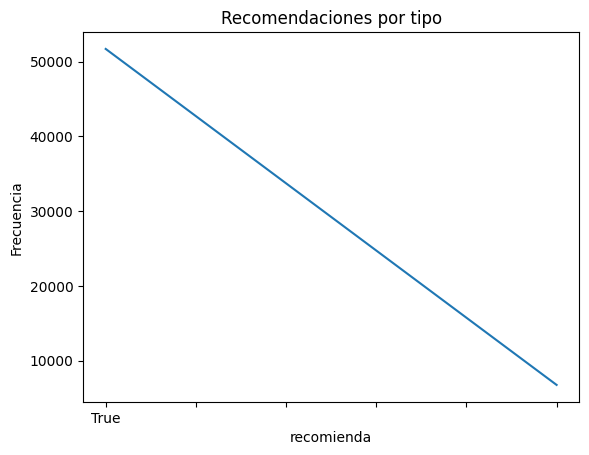

In [15]:
plt.figure()
df_reviews1['recommend'].groupby(df_reviews1['recommend']).filter(lambda x: len(x)).value_counts().plot()
plt.xlabel('recomienda')
plt.ylabel('Frecuencia')
plt.title('Recomendaciones por tipo')
plt.show()

In [16]:
df_items1.drop(['playtime_2weeks','index'], axis=1, inplace=True)
df_items1

,item_id,item_name,playtime_forever
0,10,Counter-Strike,6
1,20,Team Fortress Classic,0
2,30,Day of Defeat,7
3,40,Deathmatch Classic,0
4,50,Half-Life: Opposing Force,0
...,...,...,...
1442047,730,Counter-Strike: Global Offensive,4557
1442048,304930,Unturned,677
1442049,227940,Heroes & Generals,43
1442050,388490,One Way To Die: Steam Edition,3


In [17]:
# cambiamos la fecha que no nos permite reformatear la columna 'posted'
df_reviews1.loc[df_reviews1['posted'] == ' February 29.', 'posted'] = 'February 28'
df_reviews1.loc[df_reviews1['posted'] == 'February 29.', 'posted'] = 'February 28'

In [18]:
# reformateamos la columna posted
fecha = lambda x: parser.parse(x)
fecha_formateada = df_reviews1['posted']
df_reviews1['posted'] = fecha_formateada.apply(fecha)

In [19]:
# creamos una nueva columna con el año en que se creo la reseña 'posted'
df_reviews1['posted_year'] = df_reviews1['posted'].dt.year
df_reviews1

,posted,item_id,recommend,review,sentiment,sentiment_analisys,posted_year
0,2011-11-05,1250,True,Simple yet with great replayability. In my opi...,0.174444,1,2011
1,2011-07-15,22200,True,It's unique and worth a playthrough.,0.337500,1,2011
2,2011-04-21,43110,True,Great atmosphere. The gunplay can be a bit chu...,0.050000,0,2011
3,2014-06-24,251610,True,I know what you think when you see this title ...,0.114583,1,2014
4,2013-09-08,227300,True,For a simple (it's actually not all that simpl...,-0.036111,0,2013
...,...,...,...,...,...,...,...
58425,2023-07-10,70,True,a must have classic from steam definitely wort...,0.233333,1,2023
58426,2023-07-08,362890,True,this game is a perfect remake of the original ...,0.142500,1,2023
58427,2023-07-03,273110,True,had so much fun plaing this and collecting res...,0.087500,0,2023
58428,2023-07-20,730,True,:D,1.000000,2,2023


In [20]:
#Juegos con 0 play_time
len(df_items1[df_items1['playtime_forever'] == 0])

10146

In [21]:
# renombramos la columna id para poder hacer merge con df_items1
df_games.rename(columns={'id': 'item_id'}, inplace=True)
df_games.drop(['index','publisher','app_name','url','tags','specs','early_access','developer'], axis=1, inplace=True)
df_games

,genres,title,release_date,reviews_url,item_id
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,http://steamcommunity.com/app/643980/reviews/?...,643980
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,http://steamcommunity.com/app/670290/reviews/?...,670290
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,http://steamcommunity.com/app/767400/reviews/?...,767400
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,http://steamcommunity.com/app/772540/reviews/?...,772540
...,...,...,...,...,...
22525,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04,http://steamcommunity.com/app/745400/reviews/?...,745400
22526,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,http://steamcommunity.com/app/773640/reviews/?...,773640
22527,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,http://steamcommunity.com/app/733530/reviews/?...,733530
22528,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,http://steamcommunity.com/app/610660/reviews/?...,610660


In [22]:
# elimino las filas que contienen datos que no nos sirven y que no se pueden cambiar a dt
df_games.drop(df_games[(df_games['release_date'] == 'SOON™')].index, inplace=True)
df_games.drop(df_games[(df_games['release_date'] == 'SOON')].index, inplace=True)

In [23]:
# convertimos relese_date a formato datetime
df_games['release_date'] = pd.to_datetime(df_games['release_date'], format ='mixed')

In [24]:
df_games

,genres,title,release_date,reviews_url,item_id
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,http://steamcommunity.com/app/643980/reviews/?...,643980
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,http://steamcommunity.com/app/670290/reviews/?...,670290
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,http://steamcommunity.com/app/767400/reviews/?...,767400
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,http://steamcommunity.com/app/772540/reviews/?...,772540
...,...,...,...,...,...
22525,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04,http://steamcommunity.com/app/745400/reviews/?...,745400
22526,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,http://steamcommunity.com/app/773640/reviews/?...,773640
22527,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,http://steamcommunity.com/app/733530/reviews/?...,733530
22528,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,http://steamcommunity.com/app/610660/reviews/?...,610660


In [25]:
# extraemos el año de lanzamiento para ponerlo en una nueva columna
df_games['release_year'] = df_games['release_date'].dt.year
df_games

,genres,title,release_date,reviews_url,item_id,release_year
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140,2018
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,http://steamcommunity.com/app/643980/reviews/?...,643980,2018
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,http://steamcommunity.com/app/670290/reviews/?...,670290,2017
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,http://steamcommunity.com/app/767400/reviews/?...,767400,2017
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,http://steamcommunity.com/app/772540/reviews/?...,772540,2018
...,...,...,...,...,...,...
22525,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04,http://steamcommunity.com/app/745400/reviews/?...,745400,2018
22526,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,http://steamcommunity.com/app/773640/reviews/?...,773640,2018
22527,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,http://steamcommunity.com/app/733530/reviews/?...,733530,2018
22528,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,http://steamcommunity.com/app/610660/reviews/?...,610660,2018


In [26]:
# cambiamos el tipo de dato de la columna item_id para poder hacer merge con df_games
df_items1["item_id"] = df_items1["item_id"].astype(str).astype(int)
df_items1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442052 entries, 0 to 1442051
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   item_id           1442052 non-null  int64 
 1   item_name         1442052 non-null  object
 2   playtime_forever  1442052 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 33.0+ MB


In [27]:
# cambiamos el tipo de dato de la columna item_id para poder hacer merge con df_items1
df_games["item_id"] = df_games["item_id"].astype(str).astype(int)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22528 entries, 0 to 22529
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        22528 non-null  object        
 1   title         22528 non-null  object        
 2   release_date  22528 non-null  datetime64[ns]
 3   reviews_url   22528 non-null  object        
 4   item_id       22528 non-null  int64         
 5   release_year  22528 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(3)
memory usage: 1.1+ MB


In [28]:
df_games_items = pd.merge(df_games, df_items1, on='item_id')
df_games_items

,genres,title,release_date,reviews_url,item_id,release_year,item_name,playtime_forever
0,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,5
1,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,0
2,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,13
3,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,110
4,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,8
...,...,...,...,...,...,...,...,...
1191701,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,847
1191702,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,6096
1191703,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,556
1191704,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,1126


In [29]:
# creamo una nueva columna con playtime_forever convertido a horas jugadas
df_games_items['playtime_hours'] = df_games_items['playtime_forever'] / (60)
df_games_items

,genres,title,release_date,reviews_url,item_id,release_year,item_name,playtime_forever,playtime_hours
0,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,5,0.083333
1,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,0,0.000000
2,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,13,0.216667
3,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,110,1.833333
4,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,8,0.133333
...,...,...,...,...,...,...,...,...,...
1191701,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,847,14.116667
1191702,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,6096,101.600000
1191703,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,556,9.266667
1191704,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,1126,18.766667


In [30]:
# ordenamos generos por may tiempo de juego
df_funcion1 = df_games_items.sort_values(by = 'playtime_hours', ascending = False)[['genres','release_year','playtime_hours']]
df_funcion1.reset_index (drop = True , inplace = True )
df_funcion1.to_parquet('df_funcion1.parquet', engine='auto', compression='snappy')
df_funcion1

,genres,release_year,playtime_hours
0,"[Indie, Simulation]",2006,10712.883333
1,"[Action, Adventure, Casual, Free to Play, Mass...",2012,10588.250000
2,"[Indie, Simulation]",2006,10223.516667
3,"[Indie, Simulation]",2006,9195.316667
4,"[Action, Free to Play, Massively Multiplayer, ...",2003,8848.033333
...,...,...,...
1191701,"[Indie, Simulation]",2016,0.000000
1191702,[Strategy],2006,0.000000
1191703,"[Indie, Strategy]",2013,0.000000
1191704,"[Action, Indie]",2016,0.000000


In [31]:
df_games_items.rename(columns={'reviews_url': 'user_url'}, inplace=True)
df_games_items

,genres,title,release_date,user_url,item_id,release_year,item_name,playtime_forever,playtime_hours
0,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,5,0.083333
1,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,0,0.000000
2,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,13,0.216667
3,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,110,1.833333
4,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,8,0.133333
...,...,...,...,...,...,...,...,...,...
1191701,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,847,14.116667
1191702,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,6096,101.600000
1191703,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,556,9.266667
1191704,[Action],Counter-Strike: Condition Zero,2004-03-01,http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,1126,18.766667


In [32]:
users = pd.merge(df_games_items, df_items, how='outer')
users.drop(users.columns[[0,1,2,4,5,6,7,8,10,11]], axis='columns', inplace=True)
users

,user_url,index,steam_id
0,http://steamcommunity.com/app/282010/reviews/?...,NaN,NaN
1,http://steamcommunity.com/app/282010/reviews/?...,NaN,NaN
2,http://steamcommunity.com/app/282010/reviews/?...,NaN,NaN
3,http://steamcommunity.com/app/282010/reviews/?...,NaN,NaN
4,http://steamcommunity.com/app/282010/reviews/?...,NaN,NaN
...,...,...,...
1279354,http://steamcommunity.com/profiles/76561198323...,88305.0,76561198323066619
1279355,http://steamcommunity.com/profiles/76561198326...,88306.0,76561198326700687
1279356,http://steamcommunity.com/id/XxLaughingJackClo...,88307.0,76561198328759259
1279357,http://steamcommunity.com/profiles/76561198329...,88308.0,76561198329548331


In [33]:
# eliminamos nulos
users.dropna(inplace=True)
users

,user_url,index,steam_id
1191706,http://steamcommunity.com/profiles/76561197970...,0.0,76561197970982479
1191707,http://steamcommunity.com/id/js41637,1.0,76561198035864385
1191708,http://steamcommunity.com/id/evcentric,2.0,76561198007712555
1191709,http://steamcommunity.com/id/Riot-Punch,3.0,76561197963445855
1191710,http://steamcommunity.com/id/doctr,4.0,76561198002099482
...,...,...,...
1279354,http://steamcommunity.com/profiles/76561198323...,88305.0,76561198323066619
1279355,http://steamcommunity.com/profiles/76561198326...,88306.0,76561198326700687
1279356,http://steamcommunity.com/id/XxLaughingJackClo...,88307.0,76561198328759259
1279357,http://steamcommunity.com/profiles/76561198329...,88308.0,76561198329548331


In [34]:
df_funcion2 = df_games_items.sort_values(by = 'playtime_hours', ascending=False)[['genres','user_url','playtime_hours']]
df_funcion2

,genres,user_url,playtime_hours
6839,"[Indie, Simulation]",http://steamcommunity.com/app/4000/reviews/?br...,10712.883333
230681,"[Action, Adventure, Casual, Free to Play, Mass...",http://steamcommunity.com/app/212200/reviews/?...,10588.250000
10527,"[Indie, Simulation]",http://steamcommunity.com/app/4000/reviews/?br...,10223.516667
4846,"[Indie, Simulation]",http://steamcommunity.com/app/4000/reviews/?br...,9195.316667
1053323,"[Action, Free to Play, Massively Multiplayer, ...",http://steamcommunity.com/app/8500/reviews/?br...,8848.033333
...,...,...,...
526805,"[Indie, Simulation]",http://steamcommunity.com/app/479040/reviews/?...,0.000000
31159,[Strategy],http://steamcommunity.com/app/4770/reviews/?br...,0.000000
816757,"[Indie, Strategy]",http://steamcommunity.com/app/233110/reviews/?...,0.000000
526803,"[Action, Indie]",http://steamcommunity.com/app/477950/reviews/?...,0.000000


In [35]:
df_funcion2.to_parquet('df_funcion2.parquet', engine='auto', compression='snappy')

In [36]:
# cambiamos el tipo de dato de la columna item_id para poder hacer merge con df_items1
df_reviews1["item_id"] = df_reviews1["item_id"].astype(str).astype(int)
df_reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58430 entries, 0 to 58429
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   posted              58430 non-null  datetime64[ns]
 1   item_id             58430 non-null  int64         
 2   recommend           58430 non-null  bool          
 3   review              58430 non-null  object        
 4   sentiment           58430 non-null  float64       
 5   sentiment_analisys  58430 non-null  int64         
 6   posted_year         58430 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(2), object(1)
memory usage: 2.5+ MB


In [37]:
# creamos un nuevo dataframe para poder revisar los juegos mas jugados
df_items_reviews1 = pd.merge(df_reviews1,df_items1)
df_items_reviews1

,posted,item_id,recommend,review,sentiment,sentiment_analisys,posted_year,item_name,playtime_forever
0,2011-11-05,1250,True,Simple yet with great replayability. In my opi...,0.174444,1,2011,Killing Floor,10006
1,2011-11-05,1250,True,Simple yet with great replayability. In my opi...,0.174444,1,2011,Killing Floor,428
2,2011-11-05,1250,True,Simple yet with great replayability. In my opi...,0.174444,1,2011,Killing Floor,1646
3,2011-11-05,1250,True,Simple yet with great replayability. In my opi...,0.174444,1,2011,Killing Floor,0
4,2011-11-05,1250,True,Simple yet with great replayability. In my opi...,0.174444,1,2011,Killing Floor,3546
...,...,...,...,...,...,...,...,...,...
271668950,2023-03-05,431510,True,Highly recommended! The storyline for shou is ...,0.280000,1,2023,Mystic Destinies: Serendipity of Aeons,28
271668951,2023-03-05,431510,True,Highly recommended! The storyline for shou is ...,0.280000,1,2023,Mystic Destinies: Serendipity of Aeons,20
271668952,2023-03-05,431510,True,Highly recommended! The storyline for shou is ...,0.280000,1,2023,Mystic Destinies: Serendipity of Aeons,37
271668953,2023-03-05,431510,True,Highly recommended! The storyline for shou is ...,0.280000,1,2023,Mystic Destinies: Serendipity of Aeons,3


In [38]:
# filtramos por juegos que estan recomendados 'True'
recomendados = df_items_reviews1[df_items_reviews1.recommend ==True]

In [39]:
# agrugamos y contamos los datos para la funcion 3
df_funcion3 = recomendados.groupby(['posted_year','item_name'])['recommend'].count()
# ordenamos de mayor a menor
df_funcion3 = df_funcion3.sort_values(ascending=False)


In [40]:
# convertimos a dataframe y reseteamos indice 
df_funcion3 = pd.DataFrame(df_funcion3)
df_funcion3 = df_funcion3.reset_index()
df_funcion3

,posted_year,item_name,recommend
0,2015,Counter-Strike: Global Offensive,42768216
1,2014,Counter-Strike: Global Offensive,29912544
2,2023,Counter-Strike: Global Offensive,17869104
3,2014,Garry's Mod,14324711
4,2015,Garry's Mod,6755511
...,...,...,...
5707,2023,Vernon's Legacy,1
5708,2023,Technolust,1
5709,2023,Dark Parables: The Exiled Prince Collector's E...,1
5710,2023,And So It Was,1


In [41]:
# guardamos el archivo para la funcion
df_funcion3.to_parquet('df_funcion3.parquet', engine='auto', compression='snappy')

In [42]:
# filtramos por juegos recomendados como 'False'
no_recomendados = df_items_reviews1[df_items_reviews1.recommend ==False]

In [43]:
# agrugamos y contamos los datos para la funcion 4
df_funcion4 = no_recomendados.groupby(['posted_year','item_name'])['recommend'].count()
# ordenamos de mayor a menor
df_funcion4 = df_funcion4.sort_values(ascending=False)
df_funcion4

posted_year  item_name                       
2015         Counter-Strike: Global Offensive    3613032
2023         Counter-Strike: Global Offensive    2548728
2014         Counter-Strike: Global Offensive    1512432
2015         PAYDAY 2                            1443150
             Rust                                 376705
                                                  ...   
             World of Subways 1 – The Path             2
2023         The Legend: A University Story            2
2015         Deer Hunt Legends                         1
             Avaris 2                                  1
2023         Dance Magic                               1
Name: recommend, Length: 2209, dtype: int64

In [44]:
# convertimos a dataframe y reseteamos indice 
df_funcion4 = pd.DataFrame(df_funcion4)
df_funcion4 = df_funcion4.reset_index()
df_funcion4

,posted_year,item_name,recommend
0,2015,Counter-Strike: Global Offensive,3613032
1,2023,Counter-Strike: Global Offensive,2548728
2,2014,Counter-Strike: Global Offensive,1512432
3,2015,PAYDAY 2,1443150
4,2015,Rust,376705
...,...,...,...
2204,2015,World of Subways 1 – The Path,2
2205,2023,The Legend: A University Story,2
2206,2015,Deer Hunt Legends,1
2207,2015,Avaris 2,1


In [45]:
# guardamos el archivo para la funcion
df_funcion4.to_parquet('df_funcion4.parquet', engine='auto', compression='snappy')

In [46]:
# borramos los archivos que no usaremos
remove("df_games.parquet")
remove("df_items.parquet")
remove("df_items1.parquet")
remove("df_reviews.parquet")